<a href="https://colab.research.google.com/github/Yahred/evolutionary-computation/blob/main/CNN-Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo de una red neuronal convolucional

En este Notebook se llevará a cabo la realización de una red neuronal convolucional para la clasificación de imagenes con el dataset de numeros MNIST mediante el uso de TF y Keras.

# 1. Tratamiento de los datos

Primero cargaremos todos los módulos necesarios.

In [31]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import Sequential, datasets
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Flatten, Dense, Softmax, Dropout

Se carga el dataset y se divide:

In [18]:
mnist = datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Definimos una función para graficar un conjunto de imagenes

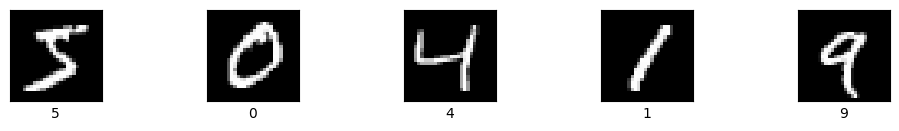

In [9]:
def graficar_imagenes(imagenes, etiquetas):
  plt.figure(figsize=(10, 5))
  for i in range(len(imagenes)):
    plt.subplot(4, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagenes[i], cmap='gray')
    plt.xlabel(etiquetas[i])

  plt.tight_layout()
  plt.show()

graficar_imagenes(train_images[0:5], train_labels[0:5])

Normalización del dataset

In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0

# 2. Definición del modelo

La arquitectura del modelo se va a componer del siguiente patrón:

 Conv-Pool-Conv-Pool-FC-FC-FC-Softmax.

In [26]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 3. Entrenamiento del modelo

In [28]:
model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0818 - accuracy: 0.9784 - val_loss: 0.0419 - val_accuracy: 0.9890
Epoch 2/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0635 - accuracy: 0.9838 - val_loss: 0.0581 - val_accuracy: 0.9832
Epoch 3/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0523 - accuracy: 0.9867 - val_loss: 0.0483 - val_accuracy: 0.9873
Epoch 4/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0468 - accuracy: 0.9878 - val_loss: 0.0711 - val_accuracy: 0.9820
Epoch 5/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0392 - accuracy: 0.9889 - val_loss: 0.0957 - val_accuracy: 0.9789


# 4. Validación del modelo

In [29]:
y_pred = model.predict(test_images)

313/313 [==============================] - 2s 7ms/step


Se grafican las primeras diez predicciones

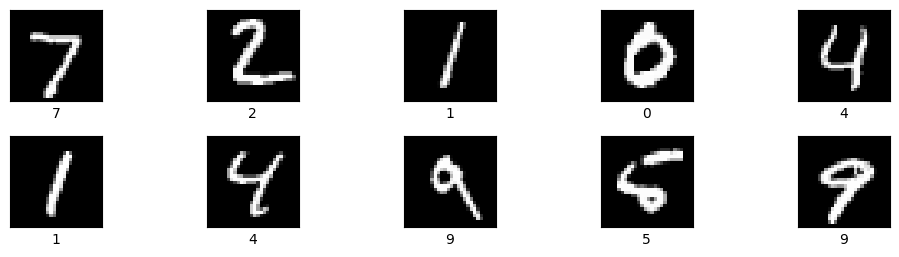

In [33]:
imagenes = test_images[0:10]
etiquetas = [np.argmax(pred) for pred in y_pred[0:10]]

graficar_imagenes(imagenes, etiquetas)